# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [2]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [3]:
(x_img_train,y_label_train), (x_img_test, y_label_test)=cifar100.load_data()

In [4]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [5]:
x_img_train.shape

(50000, 32, 32, 3)

In [6]:
y_label_train.shape

(50000, 1)

In [7]:
x_img_test.shape

(10000, 32, 32, 3)

In [8]:
y_label_test.shape

(10000, 1)

In [9]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: 
        num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title='idx: ' + str(i)+', label: '+str(labels[i][0])
        if len(prediction)>0:
            title+='=>'+prediction[i]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

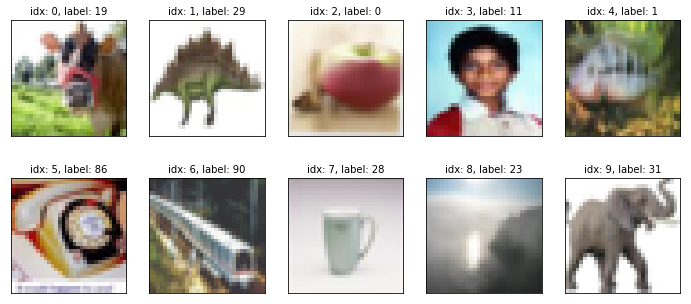

In [10]:
#針對不同的影像作標記
plot_images_labels_prediction(x_img_train,y_label_train,[], 0)

# Image normalize 

In [17]:
x_img_train[2][0][0]

array([250, 250, 248], dtype=uint8)

In [12]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [15]:
x_img_train_normalize[2][0][0]

array([0.98039216, 0.98039216, 0.972549  ], dtype=float32)

# 轉換label 為OneHot Encoding

In [18]:
y_label_train.shape

(50000, 1)

In [30]:
y_label_train[:10]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1],
       [86],
       [90],
       [28],
       [23],
       [31]])

In [31]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [33]:
y_label_train_OneHot.shape

(50000, 100)

In [34]:
y_label_train_OneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)